# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date  
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hay river
Processing Record 2 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 3 of Set 1 | paradwip
City not found. Skipping...
Processing Record 4 of Set 1 | saskylakh
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | port alfred
Processing Record 7 of Set 1 | east london
Processing Record 8 of Set 1 | byron bay
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | torbay
Processing Record 11 of Set 1 | lagoa
Processing Record 12 of Set 1 | halalo
City not found. Skipping...
Processing Record 13 of Set 1 | portland
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | chikoy
City not found. Skipping...
Processing Record 16 of Set 1 | ratlam
Processing Record 17 of Set 1 | maragogi
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | orlik
Processing Record 20 of Set 1 | illoqqortoormiut
City

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          544
Lat           544
Lng           544
Max Temp      544
Humidity      544
Cloudiness    544
Wind Speed    544
Country       544
Date          544
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hay river,60.8156,-115.7999,5.74,64,56,4.98,CA,1682295224
1,saskylakh,71.9167,114.0833,-13.37,98,97,2.25,RU,1682295225
2,busselton,-33.6500,115.3333,15.13,65,95,10.72,AU,1682295225
3,port alfred,-33.5906,26.8910,19.82,64,97,1.36,ZA,1682295225
4,east london,-33.0153,27.9116,20.15,59,100,2.40,ZA,1682295176


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hay river,60.8156,-115.7999,5.74,64,56,4.98,CA,1682295224
1,saskylakh,71.9167,114.0833,-13.37,98,97,2.25,RU,1682295225
2,busselton,-33.6500,115.3333,15.13,65,95,10.72,AU,1682295225
3,port alfred,-33.5906,26.8910,19.82,64,97,1.36,ZA,1682295225
4,east london,-33.0153,27.9116,20.15,59,100,2.40,ZA,1682295176


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

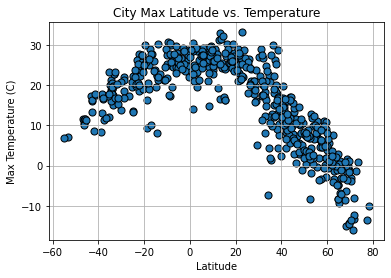

<Figure size 720x576 with 0 Axes>

In [9]:
# Build scatter plot for latitude vs. temperature
lat_temp = city_data_df
lat = city_data_df["Lat"]
temp = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(lat, temp, s=50, edgecolors="black")
plt.grid(True)
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.figure(figsize=(10, 8))

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

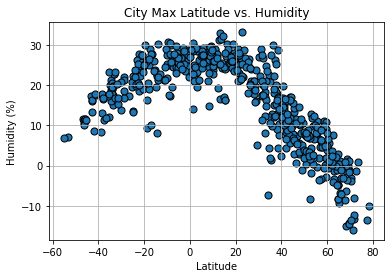

<Figure size 720x576 with 0 Axes>

In [10]:
# Build the scatter plots for latitude vs. humidity
humidity = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(lat, humidity, s=50, edgecolors="black")
plt.grid(True)
plt.title("City Max Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.figure(figsize=(10, 8))

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

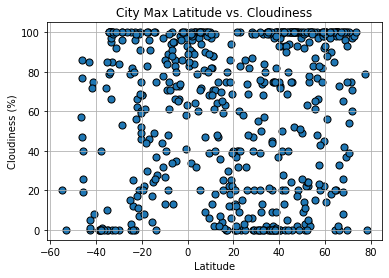

<Figure size 720x576 with 0 Axes>

In [11]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(lat, cloudiness, s=50, edgecolors="black")
plt.grid(True)
plt.title("City Max Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.figure(figsize=(10, 8))

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

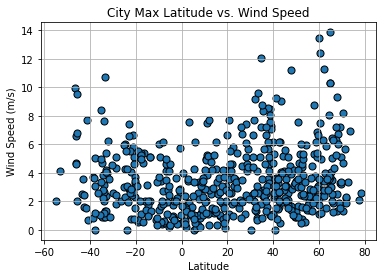

<Figure size 720x576 with 0 Axes>

In [12]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(lat, wind_speed, s=50, edgecolors="black")
plt.grid(True)
plt.title("City Max Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.figure(figsize=(10, 8))

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
from scipy import stats
import scipy.stats as st

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hay river,60.8156,-115.7999,5.74,64,56,4.98,CA,1682295224
1,saskylakh,71.9167,114.0833,-13.37,98,97,2.25,RU,1682295225
6,ribeira grande,38.5167,-28.7000,17.65,96,100,8.49,PT,1682295226
7,torbay,47.6666,-52.7314,2.99,95,100,11.18,CA,1682295226
8,lagoa,39.0500,-27.9833,15.95,95,100,7.31,PT,1682295226


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,busselton,-33.6500,115.3333,15.13,65,95,10.72,AU,1682295225
3,port alfred,-33.5906,26.8910,19.82,64,97,1.36,ZA,1682295225
4,east london,-33.0153,27.9116,20.15,59,100,2.40,ZA,1682295176
5,byron bay,-28.6500,153.6167,22.06,63,100,4.34,AU,1682295226
12,maragogi,-9.0122,-35.2225,25.03,83,71,3.46,BR,1682295229


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.89


<Figure size 720x576 with 0 Axes>

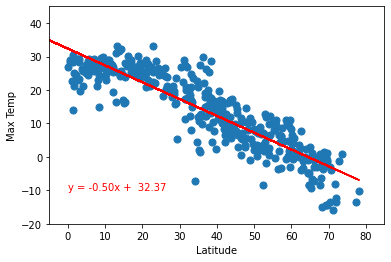

<Figure size 720x576 with 0 Axes>

In [16]:
# Linear regression on Northern Hemisphere
north_lat = northern_hemi_df["Lat"]
north_temp = northern_hemi_df["Max Temp"]

wp_slope, wp_int, wp_ir, wp_ip, wp_std_err = stats.linregress(north_lat, north_temp)
north_fit = wp_slope * lat + wp_int
formula = f"y = {wp_slope: .2f}x + {wp_int: .2f}"


# The r-value
correlation = st.pearsonr(north_lat,north_temp)
print(f"The r-value is: {round(correlation[0],2)}")

plt.scatter(north_lat, north_temp, s=50)
plt.plot(lat,north_fit,"-", color="r")
plt.annotate(formula, xy = (0, -10), xycoords='data', color="red")

# Styling the visual
plt.xlim(left=-5)
plt.ylim(bottom=-20, top=45)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.figure(figsize=(10, 8))

The r-value is: 0.73


<Figure size 720x576 with 0 Axes>

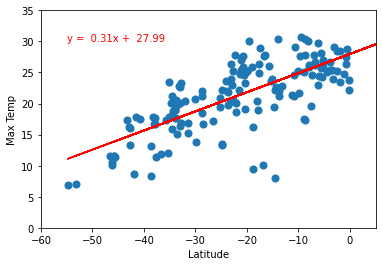

<Figure size 720x576 with 0 Axes>

In [17]:
# Linear regression on Southern Hemisphere
south_lat = southern_hemi_df["Lat"]
south_temp = southern_hemi_df["Max Temp"]

wp_slope, wp_int, wp_ir, wp_ip, wp_std_err = stats.linregress(south_lat, south_temp)
south_fit = wp_slope * lat + wp_int
formula = f"y = {wp_slope: .2f}x + {wp_int: .2f}"

# The r-value
correlation = st.pearsonr(south_lat,south_temp)
print(f"The r-value is: {round(correlation[0],2)}")

# The linear regression formula
plt.annotate(formula, xy = (-55, 30), xycoords='data', color="red")

# Scatter plot
plt.scatter(south_lat, south_temp, s=50)
plt.plot(lat,south_fit,"-", color="r")


plt.xlim(left=-60, right=5)
plt.ylim(bottom=0, top=35)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.figure(figsize=(10, 8))

**Discussion about the linear relationship:** As the latitude increases in the northern hemisphere the lower the temperature, so we see a negative correlation. On the other hand as the latitude increase, we see a increase in temperature. In other words, there is likely a positive correlation. Looking at the r-value we see that since they are both close to either 1 or -1, there is a strong correlation between the two subjects.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.120683


<Figure size 720x576 with 0 Axes>

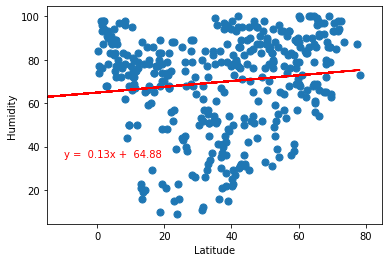

<Figure size 720x576 with 0 Axes>

In [18]:
# Northern Hemisphere
north_lat = northern_hemi_df["Lat"]
north_humidity = northern_hemi_df["Humidity"]

wp_slope, wp_int, wp_ir, wp_ip, wp_std_err = stats.linregress(north_lat, north_humidity)
north_fit = wp_slope * lat + wp_int
formula = f"y = {wp_slope: .2f}x + {wp_int: .2f}"

# The r-value
correlation = st.pearsonr(north_lat,north_humidity)
print(f"The r-value is: {round(correlation[0],6)}")
formula = f"y = {wp_slope: .2f}x + {wp_int: .2f}"

# The linear regression formula
plt.annotate(formula, xy = (-10, 35), xycoords='data', color="red")

# Scatter plot
plt.scatter(north_lat, north_humidity, s=50)
plt.plot(lat,north_fit,"-", color="r")
plt.xlim(left=-15)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.figure(figsize=(10, 8))

The r-value is: 0.376835


<Figure size 720x576 with 0 Axes>

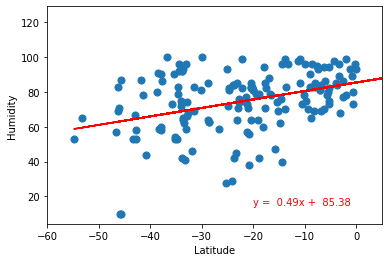

<Figure size 720x576 with 0 Axes>

In [19]:
# Southern Hemisphere
south_lat = southern_hemi_df["Lat"]
south_humidity = southern_hemi_df["Humidity"]

wp_slope, wp_int, wp_ir, wp_ip, wp_std_err = stats.linregress(south_lat, south_humidity)
south_fit = wp_slope * lat + wp_int
formula = f"y = {wp_slope: .2f}x + {wp_int: .2f}"

# The r-value
correlation = st.pearsonr(south_lat,south_humidity)
print(f"The r-value is: {round(correlation[0],6)}")

# The linear regression formula
plt.annotate(formula, xy = (-20, 15), xycoords='data', color="red")

# Scatter plot
plt.scatter(south_lat, south_humidity, s=50)
plt.plot(lat,south_fit,"-", color="r")
plt.xlim(left=-60, right=5)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.figure(figsize=(10, 8))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

**Discussion about the linear relationship:** As the latitude increases in the northern hemisphere, we see an increase in humidity. On the other hand as the latitude decreases, we see a drop in humidity. In other words, there is likely a positive correlation between the latitude and temperature. However, due to the low r-value of 0.12 and 0.37 respectively, the correlation between the two subjects are weaker and lower.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.086268


<Figure size 720x576 with 0 Axes>

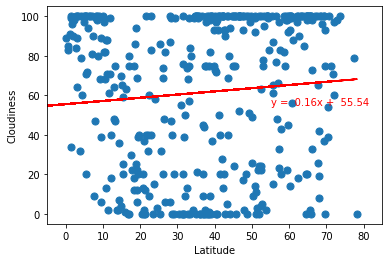

<Figure size 720x576 with 0 Axes>

In [20]:
# Northern Hemisphere
north_lat = northern_hemi_df["Lat"]
north_cloudiness = northern_hemi_df["Cloudiness"]

wp_slope, wp_int, wp_ir, wp_ip, wp_std_err = stats.linregress(north_lat, north_cloudiness)
north_fit = wp_slope * lat + wp_int
formula = f"y = {wp_slope: .2f}x + {wp_int: .2f}"

# The r-value
correlation = st.pearsonr(north_lat,north_cloudiness)
print(f"The r-value is: {round(correlation[0],6)}")

# The linear regression formula
plt.annotate(formula, xy = (55, 55), xycoords='data', color="red")

# Scatter plot
plt.scatter(north_lat, north_cloudiness, s=50)
plt.plot(lat,north_fit,"-", color="r")
plt.xlim(left=-5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.figure(figsize=(10, 8))

The r-value is: 0.246885


<Figure size 720x576 with 0 Axes>

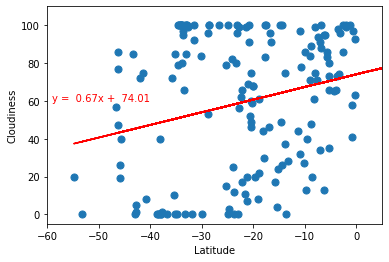

<Figure size 720x576 with 0 Axes>

In [21]:
# Southern Hemisphere
south_lat = southern_hemi_df["Lat"]
south_cloudiness = southern_hemi_df["Cloudiness"]

wp_slope, wp_int, wp_ir, wp_ip, wp_std_err = stats.linregress(south_lat, south_cloudiness)
south_fit = wp_slope * lat + wp_int
formula = f"y = {wp_slope: .2f}x + {wp_int: .2f}"

# The r-value
correlation = st.pearsonr(south_lat,south_cloudiness)
print(f"The r-value is: {round(correlation[0],6)}")

# The linear regression formula
plt.annotate(formula, xy = (-59, 60), xycoords='data', color="red")

# Scatter plot
plt.scatter(south_lat, south_cloudiness, s=50)
plt.plot(lat,south_fit,"-", color="r")
plt.xlim(left=-60, right=5)
plt.ylim(top=110, bottom = -5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.figure(figsize=(10, 8))

**Discussion about the linear relationship:** Overall, there is a positive correlation between latitude and cloudiness. However, looking at the data for the northern hemisphere, due to the r-value being close to 0, there is a very weak correlation. Similarly, we see this for the southern hemisphere with an r-value of 0.24. In other words, a low correlation.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.250484


<Figure size 720x576 with 0 Axes>

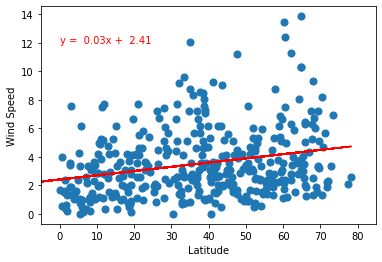

<Figure size 720x576 with 0 Axes>

In [22]:
# Northern Hemisphere
north_lat = northern_hemi_df["Lat"]
north_speed = northern_hemi_df["Wind Speed"]

wp_slope, wp_int, wp_ir, wp_ip, wp_std_err = stats.linregress(north_lat, north_speed)
north_fit = wp_slope * lat + wp_int
formula = f"y = {wp_slope: .2f}x + {wp_int: .2f}"

# The r-value
correlation = st.pearsonr(north_lat,north_speed)
print(f"The r-value is: {round(correlation[0],6)}")

# The linear regression formula
plt.annotate(formula, xy = (0, 12), xycoords='data', color="red")

# Scatter plot
plt.scatter(north_lat, north_speed, s=50)
plt.plot(lat,north_fit,"-", color="r")
plt.xlim(left=-5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.figure(figsize=(10, 8))

The r-value is: -0.270169


<Figure size 720x576 with 0 Axes>

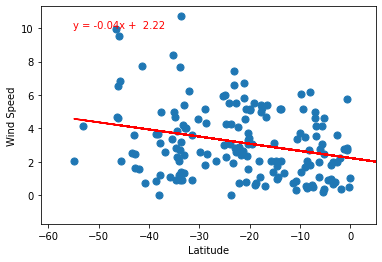

<Figure size 720x576 with 0 Axes>

In [23]:
# Southern Hemisphere
south_lat = southern_hemi_df["Lat"]
south_speed = southern_hemi_df["Wind Speed"]

wp_slope, wp_int, wp_ir, wp_ip, wp_std_err = stats.linregress(south_lat, south_speed)
south_fit = wp_slope * lat + wp_int
formula = f"y = {wp_slope: .2f}x + {wp_int: .2f}"

# The r-value
correlation = st.pearsonr(south_lat,south_speed)
print(f"The r-value is: {round(correlation[0],6)}")

# The linear regression formula
plt.annotate(formula, xy = (-55, 10), xycoords='data', color="red")

# Scatter plot
plt.scatter(south_lat, south_speed, s=50)
plt.plot(lat,south_fit,"-", color="r")
plt.xlim(right=5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.figure(figsize=(10, 8))

**Discussion about the linear relationship:** Comparing the latitude of the wind speed of the northern hemispher, we see a positive correlation. However, due to the low r-value of 0.25 – there is a weak correlation between the two. On the other side, the southern hemisphere has negative correlation. In other words, as the latitude increases, the wind speed decreases. Looking at the r-value, we see as similar, yet different situation where the r-value is -0.27. Which means that there is a weak correlation as well. 